<a href="https://colab.research.google.com/github/NodirYunusov/yunusov99/blob/main/Fruit_Helmet_Weapon_identifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot
%matplotlib inline
import torch
import fastai

In [ ]:
!git clone https://github.com/EscVM/OIDv4_ToolKit.git

In [ ]:
!cd OIDv4_ToolKit && pip install -r requirements.txt
!cd OIDv4_ToolKit && python main.py -h


In [ ]:
!cd OIDv4_ToolKit && python3 main.py downloader --Dataset /content --classes Weapon Fruit Helmet --type_csv train --limit 300

In [7]:
from fastai.vision.all import *
from ipywidgets import widgets

In [8]:
path = Path('train')
path.ls()


(#3) [Path('train/Fruit'),Path('train/Helmet'),Path('train/Weapon')]

In [9]:
transports = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    get_y = parent_label,
    item_tfms = Resize(224),
    splitter = RandomSplitter(valid_pct = 0.2, seed = 42)
)

In [10]:
dls = transports.dataloaders(path)

In [11]:
learn = cnn_learner(dls, resnet34, metrics = accuracy)
learn.fine_tune(4)

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593

epoch,train_loss,valid_loss,accuracy,time
0,1.147892,0.548282,0.838889,00:28


epoch,train_loss,valid_loss,accuracy,time
0,0.432570,0.464069,0.844444,00:35
1,0.321330,0.645320,0.827778,00:19
2,0.256236,0.663715,0.850000,00:20
3,0.205383,0.641333,0.855556,00:20


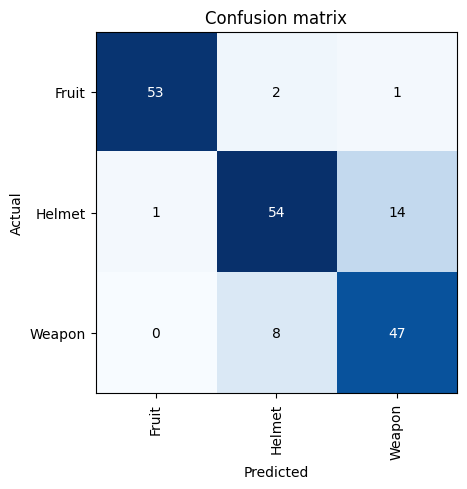

In [12]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

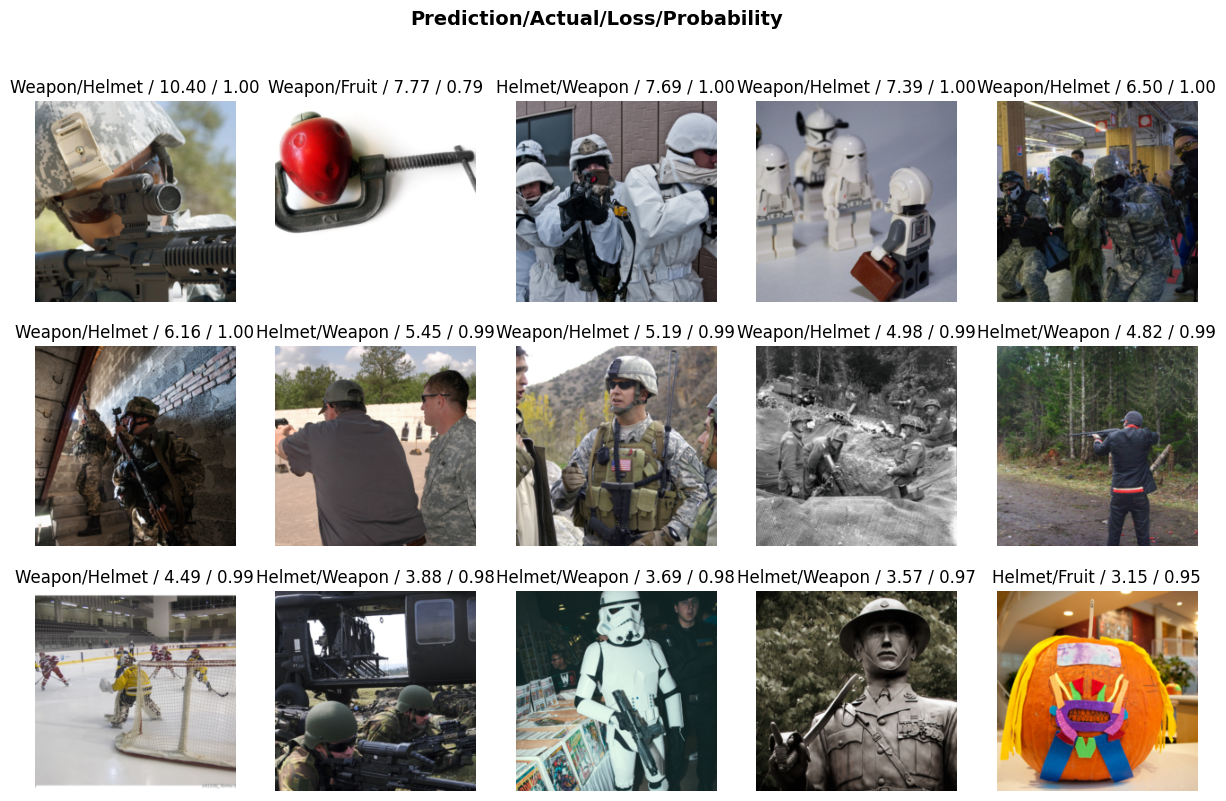

In [14]:
interp.plot_top_losses(15, nrows = 3)

In [15]:
upload = widgets.FileUpload()
upload

FileUpload(value={}, description='Upload')

Bashorat : Fruit
Ehtimollik : 0.9999998807907104


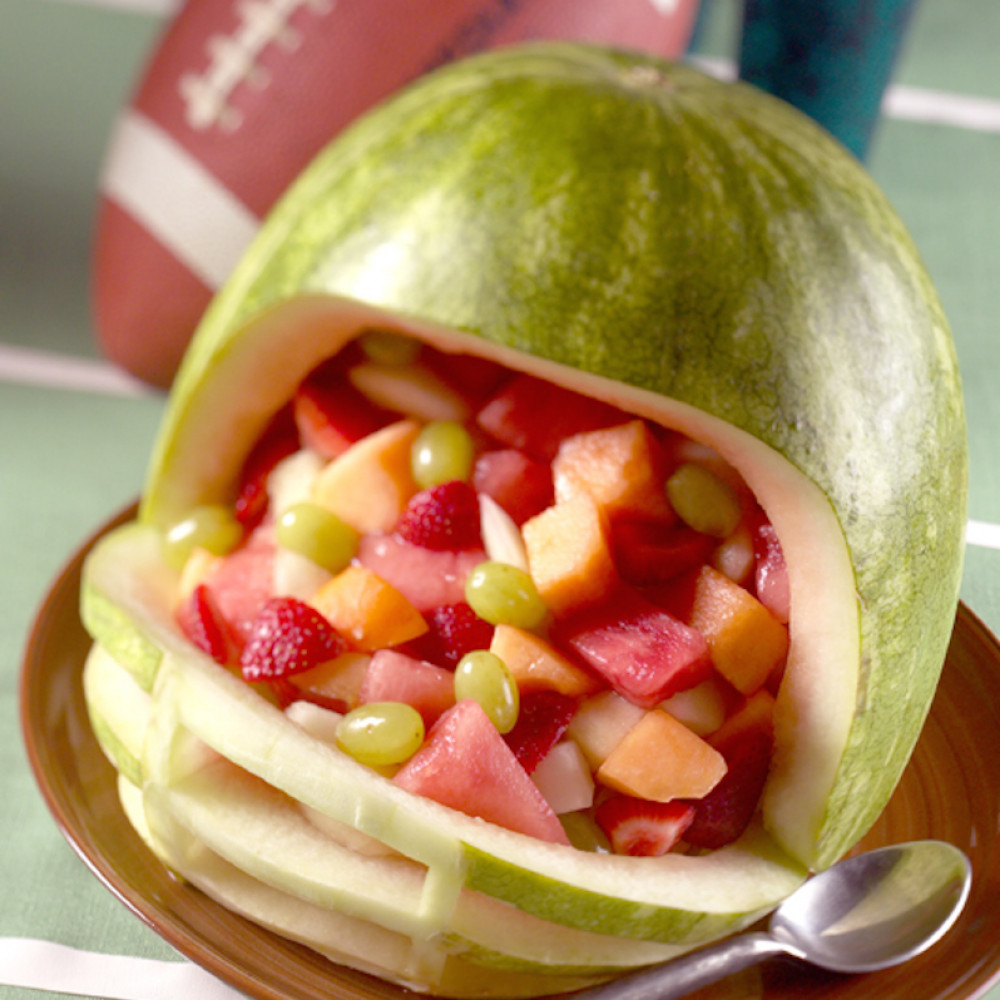

In [24]:
img = PILImage.create(upload.data[-1])
pred, pred_id, probs = learn.predict(img)
print(f'Bashorat : {pred}')
print(f'Ehtimollik : {probs[pred_id]}')
img

In [31]:
learn.export('fruit_weapon_model.pkl')
model = load_learner("/content/fruit_weapon_model.pkl")
model.predict(img)

('Fruit', tensor(0), tensor([1.0000e+00, 1.1128e-07, 1.4691e-08]))

In [32]:
import pandas as pd